In [148]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('cars_2010_2020.csv')

def rename_add_id(df):
    df.columns = df.columns.str.replace(' ','_').str.lower()
    if 'car_id' not in df.columns:
        df.insert(0, 'car_id', range(1, len(df) + 1))
    return df
    
rename_add_id(df)

# Unique no of models for each make/ company
model_counts = df.groupby('make')['model'].nunique().reset_index()
model_counts.columns=["make/company", "model"]
#model_counts

#how many unique fuel type models for each make?
fuel_type_count = df.groupby(['make','fuel_type']).size().unstack(fill_value = 0).reset_index()
fuel_type_count.columns = ["company", "Diesel", "Electric", "Hybrid", "Petrol"]
#fuel_type_count

df_2020 = df[(df['year'] == 2020 )]
df_price_count = df_2020.groupby(["make","model"]).agg(total_price = ("price_(usd)", "sum"), count=("model","size")).reset_index()
dominating_model = df_price_count.loc[df_price_count.groupby("make")["total_price"].idxmax()]

sns.set_style('darkgrid')
sns.set_theme(rc={'figure.figsize':(10.7,8.27)})
sns.barplot( x = 'make', y= 'total_price', data = dominating_model)


,car_id,make,model,year,engine_size_(l),fuel_type,price_(usd)
0,1,Volkswagen,Jetta,2010,4.2,Petrol,54073.09
1,2,Honda,Pilot,2017,4.2,Hybrid,44924.91
2,3,Nissan,Murano,2011,4.2,Hybrid,76963.44
3,4,Toyota,RAV4,2010,2.4,Petrol,30871.25
4,5,Nissan,Altima,2010,3.6,Petrol,72037.65
...,...,...,...,...,...,...,...
9995,9996,BMW,3 Series,2018,1.9,Hybrid,31676.02
9996,9997,Hyundai,Sonata,2011,2.6,Diesel,67942.46
9997,9998,Chevrolet,Impala,2011,1.3,Electric,64342.88
9998,9999,BMW,X3,2020,1.4,Diesel,50060.30


In [70]:
df

,car_id,make,model,year,engine_size_(l),fuel_type,price_(usd)
0,1,Volkswagen,Jetta,2010,4.2,Petrol,54073.09
1,2,Honda,Pilot,2017,4.2,Hybrid,44924.91
2,3,Nissan,Murano,2011,4.2,Hybrid,76963.44
3,4,Toyota,RAV4,2010,2.4,Petrol,30871.25
4,5,Nissan,Altima,2010,3.6,Petrol,72037.65
...,...,...,...,...,...,...,...
9995,9996,BMW,3 Series,2018,1.9,Hybrid,31676.02
9996,9997,Hyundai,Sonata,2011,2.6,Diesel,67942.46
9997,9998,Chevrolet,Impala,2011,1.3,Electric,64342.88
9998,9999,BMW,X3,2020,1.4,Diesel,50060.30


,make,model,total_price,count
4,Audi,Q7,986514.82,20
6,BMW,5 Series,920524.60,18
13,Chevrolet,Spark,1076486.54,23
16,Ford,F-150,908076.31,23
20,Honda,Accord,1340767.11,26
25,Hyundai,Elantra,1424994.88,28
32,Mercedes-Benz,GLA,891933.11,18
36,Nissan,Murano,964025.71,19
44,Toyota,RAV4,1089039.83,21
49,Volkswagen,Tiguan,1386008.62,28


<Axes: xlabel='make', ylabel='total_price'>

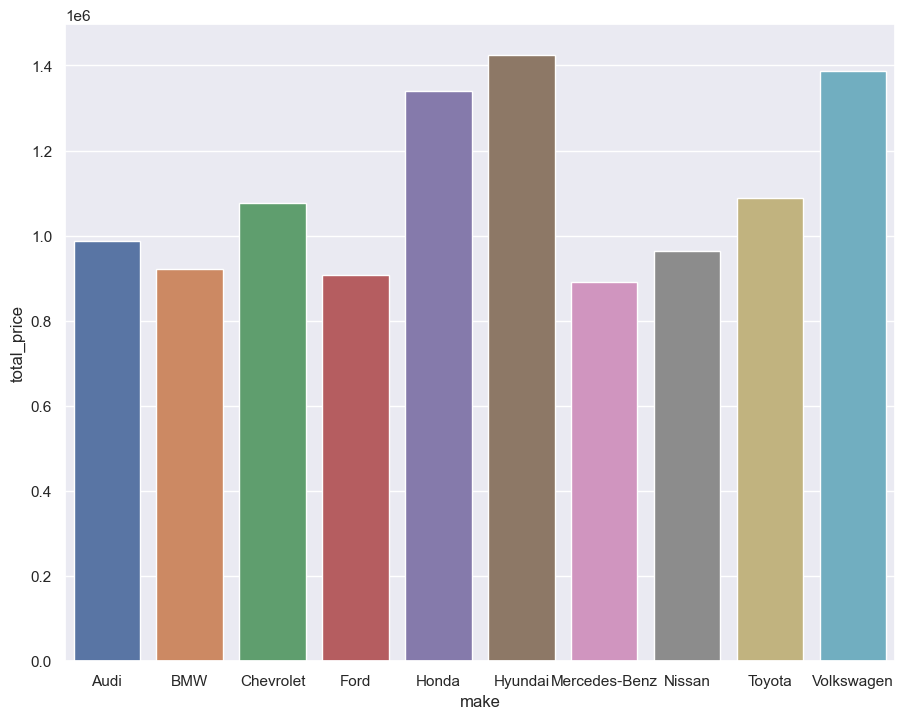